In [29]:
#多个
import re
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 20  # 替换成你想要的字体大小
# 定义数据
eval_methods = ['harmbench']
models=['llama2','vicuna']
folders = ['_without_cosdecay_and_lasthiddenstate','_with_cosdecay_and_lasthiddenstate',\
    '_with_cosdecay_and_mean_sentemb','_without_cosdecay_and_mean_sentemb']

z={}

# 创建2x2子图
# 使用for循环绘制每个子图
for i, eval_method in enumerate(eval_methods):
    for j, model in enumerate(models):
        newmodel=model
        neweval_method=eval_method
        if model=='llama2':
            newmodel='Llama-2'
        if eval_method=='kw_matching':
            neweval_method='keyword matching'
        elif eval_method=='harmbench':
            neweval_method='HarmBench'
        elif eval_method=='llamaguard':
            neweval_method='Llama Guard'
        z[neweval_method+newmodel]=[]
        for folder in folders:
            path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
            rounds=os.listdir(path)
            dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
            for dirpath in dirpaths:
                for path in os.listdir(dirpath):
                    if path.endswith('log') and path.startswith('eval'):
                        al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                        if al==0:
                            with open(os.path.join(dirpath,path),'r') as alpha:
                                content=alpha.read()
                                res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                                res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                                prev=res[0][1]
                                for k in range(len(res)):
                                    if res[k][2]==0:
                                        res[k][1]=prev
                                    prev=res[k][1]
                                z[neweval_method+newmodel].append([k[1] for k in res])
                                # if model=="llama2":
                                #     print([k[1] for k in res][-1],path)
        print(eval_method,model,z)

harmbench llama2 {'HarmBenchLlama-2': [[0, 6, 10, 13, 13, 36, 43, 40, 51, 51, 51], [0, 0, 0, 43, 35, 54, 54, 54, 54, 54, 54], [0, 0, 3, 4, 3, 3, 3, 3, 4, 4, 4], [0, 17, 32, 35, 35, 41, 36, 36, 36, 36, 36], [0, 0, 2, 13, 13, 45, 36, 41, 41, 48, 48], [0, 0, 19, 13, 18, 29, 38, 38, 54, 54, 53], [0, 6, 47, 33, 14, 29, 23, 26, 26, 28, 22], [0, 1, 14, 6, 6, 16, 6, 10, 13, 13, 13], [0, 0, 0, 0, 0, 7, 12, 0, 0, 0, 0], [0, 0, 5, 9, 25, 29, 29, 29, 29, 29, 29], [0, 0, 11, 11, 18, 13, 12, 12, 12, 12, 12], [0, 0, 0, 0, 11, 7, 7, 16, 4, 4, 10]]}
harmbench vicuna {'HarmBenchLlama-2': [[0, 6, 10, 13, 13, 36, 43, 40, 51, 51, 51], [0, 0, 0, 43, 35, 54, 54, 54, 54, 54, 54], [0, 0, 3, 4, 3, 3, 3, 3, 4, 4, 4], [0, 17, 32, 35, 35, 41, 36, 36, 36, 36, 36], [0, 0, 2, 13, 13, 45, 36, 41, 41, 48, 48], [0, 0, 19, 13, 18, 29, 38, 38, 54, 54, 53], [0, 6, 47, 33, 14, 29, 23, 26, 26, 28, 22], [0, 1, 14, 6, 6, 16, 6, 10, 13, 13, 13], [0, 0, 0, 0, 0, 7, 12, 0, 0, 0, 0], [0, 0, 5, 9, 25, 29, 29, 29, 29, 29, 29], [0, 0

HarmBench vicuna [(0, 70.33333333333333), (5, 82.0), (10, 69.0), (15, 76.0), (20, 77.0), (25, 80.0), (30, 85.0), (35, 69.0), (40, 75.66666666666667), (45, 74.0)]
HarmBench vicuna 76.40740740740742
HarmBench vicuna [(0, 70.33333333333333), (5, 65.66666666666667), (10, 84.66666666666667), (15, 76.66666666666667), (20, 71.66666666666667), (25, 68.66666666666667), (30, 70.66666666666667), (35, 81.0), (40, 70.66666666666667), (45, 83.0)]
HarmBench vicuna 74.74074074074075
HarmBench vicuna [(0, 70.33333333333333), (5, 75.33333333333333), (10, 73.0), (15, 81.33333333333333), (20, 71.0), (25, 76.33333333333333), (30, 81.33333333333333), (35, 77.33333333333333), (40, 71.33333333333333), (45, 75.66666666666667)]
HarmBench vicuna 75.85185185185185
HarmBench vicuna [(0, 70.33333333333333), (5, 66.33333333333333), (10, 72.66666666666667), (15, 77.33333333333333), (20, 78.33333333333333), (25, 77.66666666666667), (30, 69.33333333333333), (35, 69.0), (40, 73.66666666666667), (45, 83.66666666666667)]


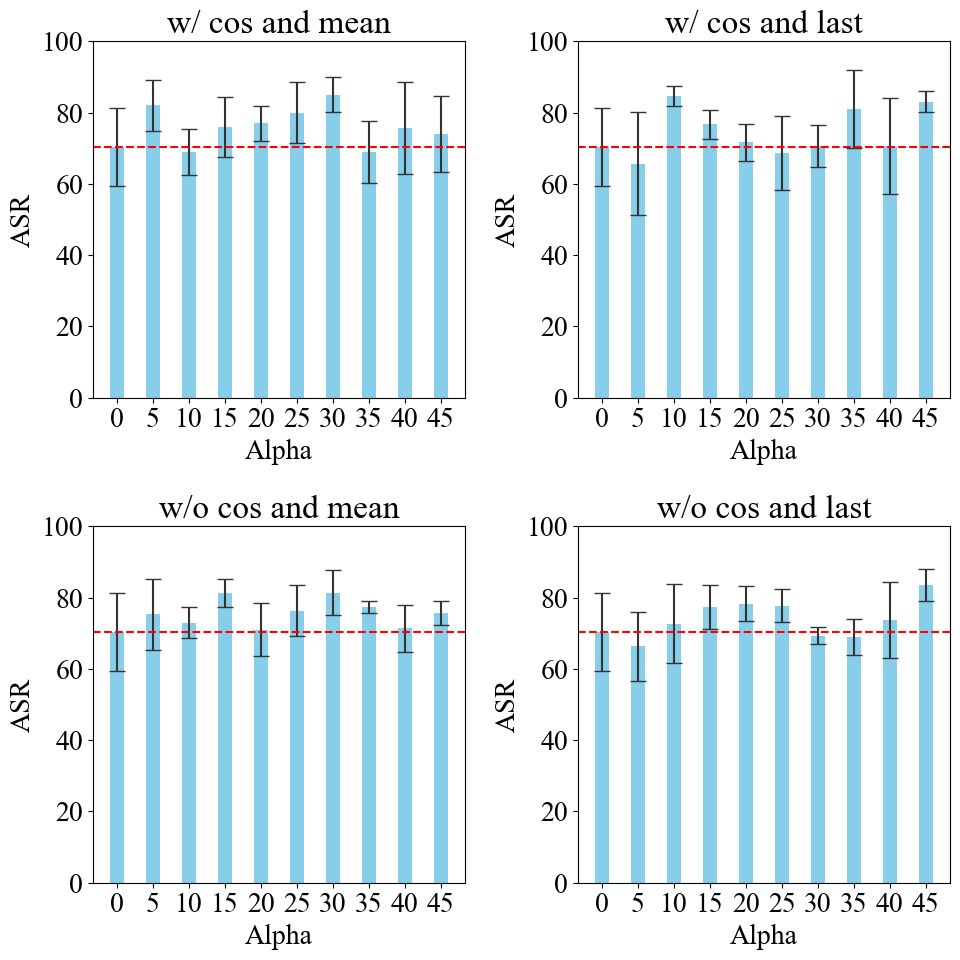

In [30]:
# 定义数据
eval_methods = ['harmbench']
model = 'vicuna'
folders = ['_with_cosdecay_and_mean_sentemb','_with_cosdecay_and_lasthiddenstate','_without_cosdecay_and_mean_sentemb','_without_cosdecay_and_lasthiddenstate']
# 创建2x2子图
fig, axs = plt.subplots(2, 2, figsize=(5*2, 5*2))
# 使用for循环绘制每个子图
for ii,folder in enumerate(folders):
    newmodel=model
    neweval_method='harmbench'
    if model=='llama2':
        newmodel='Llama-2'
    if eval_method=='kw_matching':
        neweval_method='keyword matching'
    elif eval_method=='harmbench':
        neweval_method='HarmBench'
    elif eval_method=='llamaguard':
        neweval_method='Llama Guard'
        
 
    x=[]
    y={}
    for al in range(0,50,5):
        y[al]=[]
    ax=axs[ii//2,ii%2]
    path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
    rounds=os.listdir(path)
    dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
    for dirpath in dirpaths:
        for path in os.listdir(dirpath):
            if path.endswith('log') and path.startswith('eval'):
                al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                if al!=0:
                    with open(os.path.join(dirpath,path),'r') as alpha:
                        content=alpha.read()
                        res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                        res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                        prev=res[0][1]
                        for k in range(len(res)):
                            if res[k][2]==0:
                                res[k][1]=prev
                            prev=res[k][1]
                        x=[k[0] for k in res]
                        y[al].append([k[1] for k in res])
                else:
                    y[al]=z[neweval_method+newmodel]
    # print(y)
    for al in range(0,50,5):
        # print(al)
        y[al]=np.array(y[al])

    mean_={}
    std_={}
    for al in range(0,50,5):
        mean_[al]=y[al].mean(0)
        std_[al]=y[al].std(0)
    mean__=np.array(list(mean_.values()))[:,-1]
    std__=np.array(list(std_.values()))[:,-1]
    # 使用 plt.bar() 函数创建柱形图
    bar_width = 2  # 设置条形的宽度
    bar_color = 'skyblue'  # 设置条形的颜色
    ax.bar(range(0,50,5), mean__,yerr=std__,width=bar_width,color=bar_color,error_kw = {'ecolor' : '0.2', 'capsize' :6 })
    # 添加标题和标签
    if folder=='_with_cosdecay_and_mean_sentemb':
        title='w/ cos and mean'
    elif folder=='_with_cosdecay_and_lasthiddenstate':
        title='w/ cos and last'
    elif folder=='_without_cosdecay_and_mean_sentemb':
        title='w/o cos and mean'
    elif folder=='_without_cosdecay_and_lasthiddenstate':
        title='w/o cos and last'   
    ax.set_title(f"{title}")
    # ax.tick_params(axis='x', labelrotation=45)  # 旋转45度
    ax.set_xlabel('Alpha')
    ax.set_ylabel('ASR')
    if model=='vicuna':
        ax.set_ylim(0,100)
    else:
        ax.set_ylim(0,70)
    ax.set_xticks(range(0,50,5))
    ax.axhline(y=mean__[0],color='red', linestyle='--', label='Original GCG')
    if eval_method=='harmbench':
        print(neweval_method,newmodel,[(k,v[-1]) for k,v in mean_.items()])
    import numpy as np
    if eval_method=='harmbench':
        print(neweval_method,newmodel,np.mean([v[-1] for k,v in mean_.items() if k!=0]))
    # 显示图形
# 调整布局以防止重叠
plt.tight_layout()
plt.savefig(f'harmbench_{model}_{folder}.png',dpi=600)
plt.show()

HarmBench Llama-2 [(0, 27.666666666666668), (5, 14.0), (10, 22.0), (15, 24.0), (20, 8.0), (25, 27.0), (30, 7.333333333333333), (35, 13.333333333333334), (40, 21.333333333333332), (45, 19.333333333333332)]
HarmBench Llama-2 17.37037037037037
HarmBench Llama-2 [(0, 27.666666666666668), (5, 19.333333333333332), (10, 29.666666666666668), (15, 24.333333333333332), (20, 31.0), (25, 36.666666666666664), (30, 9.333333333333334), (35, 20.333333333333332), (40, 42.666666666666664), (45, 22.0)]
HarmBench Llama-2 26.148148148148145
HarmBench Llama-2 [(0, 27.666666666666668), (5, 47.333333333333336), (10, 31.333333333333332), (15, 15.666666666666666), (20, 23.666666666666668), (25, 33.0), (30, 33.666666666666664), (35, 12.0), (40, 10.333333333333334), (45, 27.0)]
HarmBench Llama-2 26.0
HarmBench Llama-2 [(0, 27.666666666666668), (5, 11.666666666666666), (10, 16.666666666666668), (15, 9.333333333333334), (20, 26.333333333333332), (25, 17.333333333333332), (30, 9.333333333333334), (35, 31.66666666666

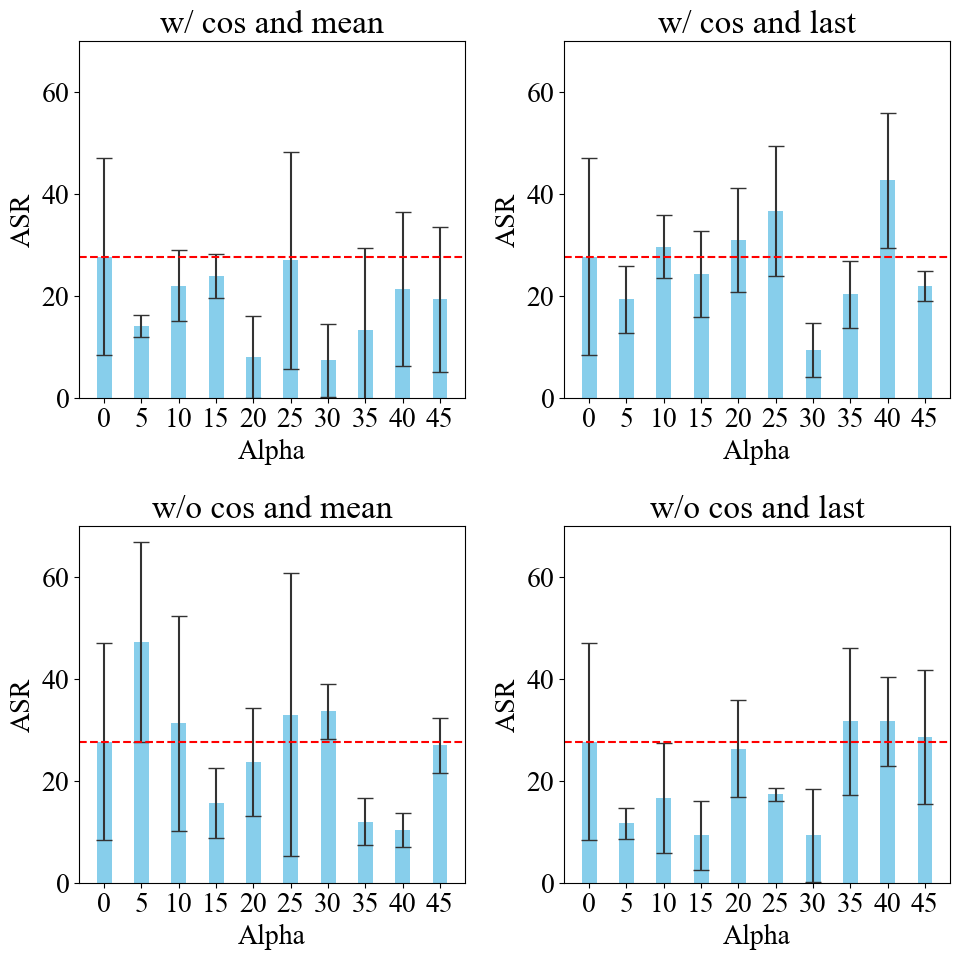

In [32]:
# 定义数据
eval_methods = ['harmbench']
model = 'llama2'
folders = ['_with_cosdecay_and_mean_sentemb','_with_cosdecay_and_lasthiddenstate','_without_cosdecay_and_mean_sentemb','_without_cosdecay_and_lasthiddenstate']
# 创建2x2子图
fig, axs = plt.subplots(2, 2, figsize=(5*2, 5*2))
# 使用for循环绘制每个子图
for ii,folder in enumerate(folders):
    newmodel=model
    neweval_method='harmbench'
    if model=='llama2':
        newmodel='Llama-2'
    if eval_method=='kw_matching':
        neweval_method='keyword matching'
    elif eval_method=='harmbench':
        neweval_method='HarmBench'
    elif eval_method=='llamaguard':
        neweval_method='Llama Guard'
        
 
    x=[]
    y={}
    for al in range(0,50,5):
        y[al]=[]
    ax=axs[ii//2,ii%2]
    path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
    rounds=os.listdir(path)
    dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
    for dirpath in dirpaths:
        for path in os.listdir(dirpath):
            if path.endswith('log') and path.startswith('eval'):
                al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                if al!=0:
                    with open(os.path.join(dirpath,path),'r') as alpha:
                        content=alpha.read()
                        res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                        res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                        prev=res[0][1]
                        for k in range(len(res)):
                            if res[k][2]==0:
                                res[k][1]=prev
                            prev=res[k][1]
                        x=[k[0] for k in res]
                        y[al].append([k[1] for k in res])
                else:
                    y[al]=z[neweval_method+newmodel]
    # print(y)
    for al in range(0,50,5):
        # print(al)
        y[al]=np.array(y[al])

    mean_={}
    std_={}
    for al in range(0,50,5):
        mean_[al]=y[al].mean(0)
        std_[al]=y[al].std(0)
    mean__=np.array(list(mean_.values()))[:,-1]
    std__=np.array(list(std_.values()))[:,-1]
    # 使用 plt.bar() 函数创建柱形图
    bar_width = 2  # 设置条形的宽度
    bar_color = 'skyblue'  # 设置条形的颜色
    ax.bar(range(0,50,5), mean__,yerr=std__,width=bar_width,color=bar_color,error_kw = {'ecolor' : '0.2', 'capsize' :6 })
    # 添加标题和标签
    if folder=='_with_cosdecay_and_mean_sentemb':
        title='w/ cos and mean'
    elif folder=='_with_cosdecay_and_lasthiddenstate':
        title='w/ cos and last'
    elif folder=='_without_cosdecay_and_mean_sentemb':
        title='w/o cos and mean'
    elif folder=='_without_cosdecay_and_lasthiddenstate':
        title='w/o cos and last'   
    ax.set_title(f"{title}")
    # ax.tick_params(axis='x', labelrotation=45)  # 旋转45度    ax.set_xlabel('Alpha')
    ax.set_xlabel('Alpha')
    ax.set_ylabel('ASR')    
    if model=='vicuna':
        ax.set_ylim(0,100)
    else:
        ax.set_ylim(0,70)
    ax.set_xticks(range(0,50,5))
    
    ax.axhline(y=mean__[0],color='red', linestyle='--', label='Original GCG')
    if eval_method=='harmbench':
        print(neweval_method,newmodel,[(k,v[-1]) for k,v in mean_.items()])
    import numpy as np
    if eval_method=='harmbench':
        print(neweval_method,newmodel,np.mean([v[-1] for k,v in mean_.items() if k!=0]))
    # 显示图形
# 调整布局以防止重叠
plt.tight_layout()
plt.savefig(f'harmbench_{model}_{folder}.png',dpi=600)
plt.show()